# REQUIREMENTS

**This should be run with a plain jupyter server**.

Go to the settings menu of cocalc, and select **Plain Jupyter Server** to see some outputs on this notebook.

### Kicking the Tires of CoCalc

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [2]:
# What Python version are we using? What OS are we on?
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]


# Begin Networkx Exploration

Reference this [documentation](https://networkx.github.io/documentation/stable/reference/functions.html#nodes) to find basic ways to manipulate these graphs.

## Package Imports

In [3]:
import networkx as nx
import random
import numpy as np
import collections
import itertools

# Plotting tools.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [6]:
# Import more powerful plotting tools for larger datasets.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter3d
from plotly.graph_objs import *
import plotly.graph_objs as go

In [7]:
# Import progress bars.
from tqdm import tnrange, tqdm_notebook

In [8]:
# Setup matplotlib for nice notebook output.
# Commands that begin with a `%` are `magic` jupyter-notebook
# specific functions.
%matplotlib notebook

## Data import

In [9]:
%pwd

'/home/tylerbiggs/git/pyluminate/notebooks'

In [10]:
# Assign the data path.
# I removed the first two lines, an empty line and a line
# that contained the count. (for simplicity)
my_data_path = 'data/water1.xyz'

In [11]:
# Open and close the file in a pythonic way.
# The file will be closed once we exit the `with` statement.
with open(my_data_path) as my_file:
    my_water_data = my_file.read()

In [12]:
# De-comment and run to view the messy state of `water_data`.
# print(water_data)

In [13]:
# Split the giant string generated above into a list.
# This also removes the newline characters, `/n`.
my_water_data = my_water_data.splitlines()

In [14]:
# Now examine the first, last, and some random lines.
print('The first line:\n\t{}'.format(my_water_data[0]))
print('The last line:\n\t{}'.format(my_water_data[-1]))
print('Some randome line:\n\t{}'.format(random.choice(my_water_data)))

The first line:
	O     0.154966E+01  0.112994E+02  0.150422E+02
The last line:
	H     0.133676E+02  0.492056E+01  0.127673E+02
Some randome line:
	O     0.102101E+01  0.114451E+02  0.122869E+02


## Creating a graph

From the `networkx` documentation.

> By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links,
etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a
customized node object, etc.

### Adding nodes with positional information

There is no magic from the networkx package here. I simply assign nodes as strings built from their atom type and line number in the list. I then add a python dictionary I name `xyz` that will hold the list of x, y, z coordinates.

In [15]:
# Create an empty graph object.
# I place this in the same code block as the loop below to
# ensure that the graph is empty each time the data is
# added to the graph.
test_graph = nx.Graph()

# For each item in the water_data list I will create a node.
# I use Python's enmuerate to easily match an index to the
# current item in the for loop.
for index, item in enumerate(my_water_data):
    
    # The item at this point is still a single string, so
    # now I will break each line into sub-lists.
    # The split() function splits by whitespace as a default.
    line = item.split()
    
    # I will name the node based on its position. The list
    # created has 4 entries, the first is the atom element,
    # the next three are the x, y and z coordinates.
    node_name = '{0}-{1}'.format(line[0], index)
    
    # Get the x, y, z coordinates.
    xa = np.float(line[1])
    ya = np.float(line[2])
    za = np.float(line[3])
        
    # Create the actual node.
    test_graph.add_node(
        node_name,
        x=xa,
        y=ya,
        z=za,
    )

#### State of the graph

The graph has a bunch of nodes that have no edges inbetween them. The nodes do however, have their x, y, z positions attached to them. We should at least be able to generate a scatter plot.

#### Getting node attributes from the graph

In [16]:
# Get the coordinate attributes back out of the graph.
x_vals = [x for x in nx.get_node_attributes(test_graph, 'x').values()]
y_vals = [x for x in nx.get_node_attributes(test_graph, 'y').values()]
z_vals = [x for x in nx.get_node_attributes(test_graph, 'z').values()]

# View the output.
# print(x_vals)

In [17]:
# Create color and size dictionaries so we can plot
# the data nicely.
color_dict = {
    'H': 'red',
    'O': 'blue',
}

size_dict = {
    'H': 25,
    'O': 60,
}

# Create the color and size lists.
c_vals = [color_dict[x[0]] for x in test_graph]
s_vals = [size_dict[x[0]] for x in test_graph]

### Plotting the X, Y, Z coordinates

<IPython.core.display.Javascript object>


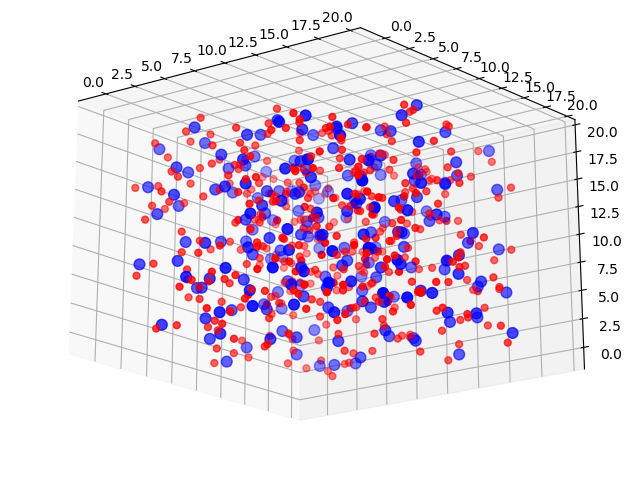

In [18]:
# Declare the figure object.
fig = plt.figure()

# Declare an axis object within / on the figure object.
# See the below link for a discussion of matplotlib's subplot.
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
ax = Axes3D(fig)

# Add the points to the scatter plot.
ax.scatter(x_vals, y_vals, z_vals, c=c_vals, s=s_vals)

# Show the plot.
plt.show()

## Creating Distance Matricies



#### Calculating the upper triangle of the distance matrix

In [19]:
# Find the length / number of atoms in the system.
test_atoms_total = len(test_graph)

# Create a matrix of zeros the size of our edges.
test_distance_matrix = np.zeros((test_atoms_total, test_atoms_total))

# We only need concern ourselves with the upper triagnle indicies.
it, jt = np.triu_indices(test_atoms_total)

# Convert the coordinate dictionary values to a numpy
# array. This is needed for easier and faster transforms.
xyz_vals = np.array([x for x in zip(x_vals, y_vals, z_vals)])

# Iterate through the upper triangle indexes and calculate
# the distance between each set of points.
for i, j in tqdm_notebook([x for x in zip(it, jt)]):
    coord_a = xyz_vals[i]
    coord_b = xyz_vals[j]
    
    test_distance_matrix[i, j] = np.linalg.norm(coord_a - coord_b)

HBox(children=(IntProgress(value=0, max=210276), HTML(value='')))

#### Building a full matrix from the upper triangle

Some google-foo pays off here.

https://stackoverflow.com/a/36250972

In [20]:
def upper_triangle_to_full_matrix(A):
    out = A.T + A
    np.fill_diagonal(out, np.diag(A))
    return out

#### Examining Our Distance Matrix

In [21]:
print('The shape of the calculated distance matrix: {}'
      .format(np.shape(test_distance_matrix)))

The shape of the calculated distance matrix: (648, 648)


This is too large, and there are too many values for us to easily view this matrix via text.

Viewing images with matplotlib is a simple tast. [Documentation Example](https://matplotlib.org/examples/ticks_and_spines/spines_demo_dropped.html)

<IPython.core.display.Javascript object>


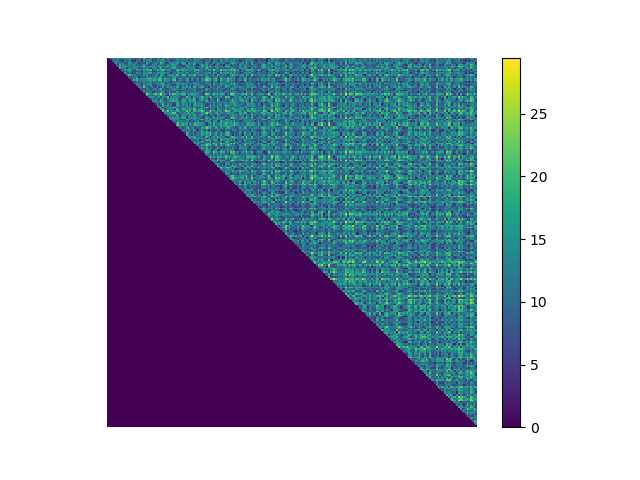

In [22]:
fig, ax = plt.subplots()
image = test_distance_matrix
cax = ax.imshow(image, interpolation='nearest')
ax.axis('off')  # clear x- and y-axes
fig.colorbar(cax)
plt.show()

### Transposing the distance matrix

<IPython.core.display.Javascript object>


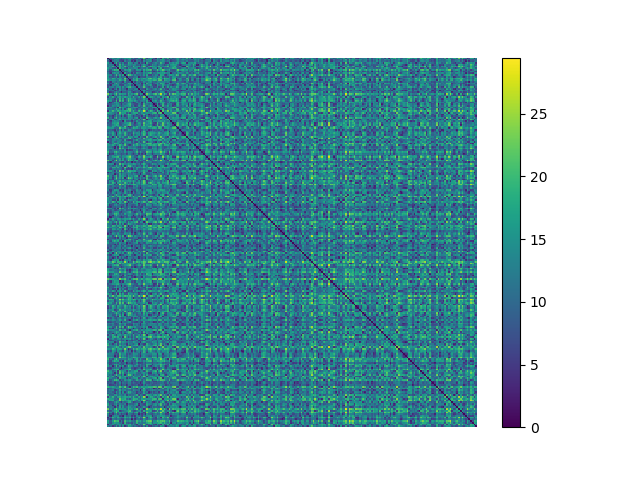

In [23]:
fig, ax = plt.subplots()
image = upper_triangle_to_full_matrix(test_distance_matrix)
cax = ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
fig.colorbar(cax)
plt.show()

In [22]:
test_distance_matrix = upper_triangle_to_full_matrix(test_distance_matrix)

## Adding Edges

Now I would like to add each array of distance values to the corresponding node.

To do this we must use the function `nx.set_node_attributes`.

We must supply the graph to be modified, and a dictionary of the nodes to be updated.

In [24]:
oxygen_water_range = [0.1, 1.2]
hydrogen_bond_range = [1.2, 2.6]

In [25]:
node_index = [x for x in test_graph.nodes()]

for node, dist_array in zip(test_graph.nodes(), test_distance_matrix):
    for index, dist in enumerate(dist_array):
        if oxygen_water_range[0] <= dist <= oxygen_water_range[1]:
            # Get the node by this index.
            test_graph.add_edge(node, node_index[index])

### Viewing the Edges

<IPython.core.display.Javascript object>


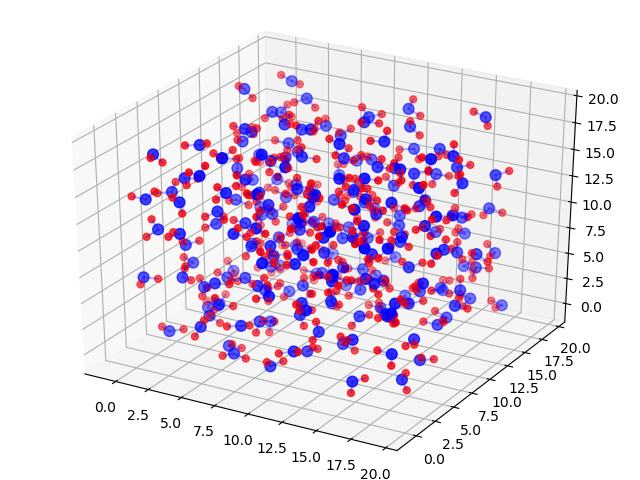

HBox(children=(IntProgress(value=0, max=432), HTML(value='')))

In [26]:
# Declare the figure object.
fig = plt.figure()

# Declare an axis object within / on the figure object.
# See the below link for a discussion of matplotlib's subplot.
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
ax = Axes3D(fig)

# Add the points to the scatter plot.
ax.scatter(x_vals, y_vals, z_vals, c=c_vals, s=s_vals)

xyz_vals = zip(x_vals, y_vals, z_vals)

# Iterate through the edges, and draw line segments for each set.
for edge in tqdm_notebook(test_graph.edges()):
    
    # Assign the node edge index names.
    node_a = edge[0]
    node_b = edge[1]
    
    # Assign the x, y, z variables.
    xa = test_graph.node('x')[node_a]
    ya = test_graph.node('y')[node_a]
    za = test_graph.node('z')[node_a]

    xb = test_graph.node('x')[node_b]
    yb = test_graph.node('y')[node_b]
    zb = test_graph.node('z')[node_b]   

    # Get the xyz coordinates for each node, and draw a segment.
    ax.plot([xa, xb], [ya, yb], [za, zb], color='b', alpha=0.3)

# Show the plot.
plt.show()    

### Edge count histogram

<IPython.core.display.Javascript object>


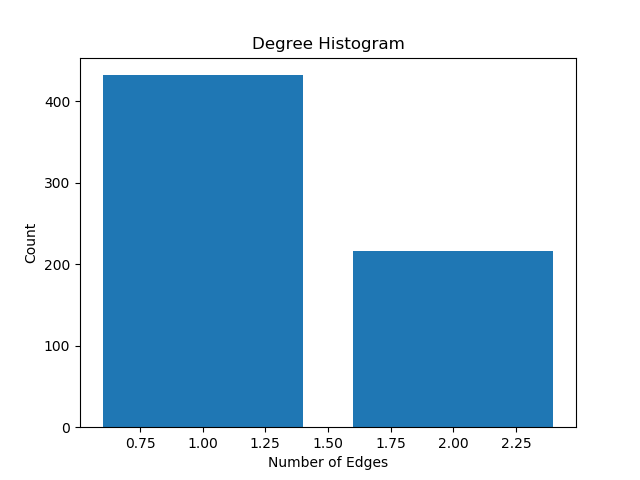

In [27]:
# Create and sort a list of number edges each node has.
degree_sequence = sorted([d for n, d in test_graph.degree()], reverse=True)  # degree sequence
# print("Degree sequence", degree_sequence)

# Count the instance of each count.
degreeCount = collections.Counter(degree_sequence)

# Create lists for use in histogram plotting.
deg, cnt = zip(*degreeCount.items())

# Declare the figure object.
# This time get the axis as well.
fig = plt.figure()
plt.bar(deg, cnt)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Number of Edges")
plt.show()

## Create Functions

In [28]:
def generate_graph(data_path='data/water1.xyz'):
    
    # Open and close the file in a pythonic way.
    # The file will be closed once we exit the `with` statement.
    with open(data_path) as my_file:
        water_data = my_file.read()

    # Split the lines by whitespace to separate the coordinates.
    water_data = water_data.splitlines()
    
    # Create an empty graph object.
    # I place this in the same code block as the loop below to
    # ensure that the graph is empty each time the data is
    # added to the graph.
    graph = nx.Graph()

    # For each item in the water_data list I will create a node.
    # I use Python's enmuerate to easily match an index to the
    # current item in the for loop.
    for index, item in enumerate(my_water_data):

        # The item at this point is still a single string, so
        # now I will break each line into sub-lists.
        # The split() function splits by whitespace as a default.
        line = item.split()

        # I will name the node based on its position. The list
        # created has 4 entries, the first is the atom element,
        # the next three are the x, y and z coordinates.
        node_name = '{0}-{1}'.format(line[0], index)

        # Get the x, y, z coordinates.
        xa = np.float(line[1])
        ya = np.float(line[2])
        za = np.float(line[3])

        # Create the actual node.
        graph.add_node(
            node_name,
            x=xa,
            y=ya,
            z=za,
        )
        
    return graph

### Distance Matrix Calculation

In [29]:
def upper_triangle_to_full_matrix(A):
    out = A.T + A
    np.fill_diagonal(out, np.diag(A))
    return out

In [30]:
def calculate_distance_matrix(in_graph):
    
    # TODO: Comment me!
    
    # Find the length / number of atoms in the system.
    atoms_total = len(in_graph)

    # Create a matrix of zeros the size of our edges.
    distance_matrix = np.zeros((atoms_total, atoms_total))

    # We only need concern ourselves with the upper triagnle indicies.
    it, jt = np.triu_indices(atoms_total)

    # Convert the coordinate dictionary values to a numpy
    # array. This is needed for easier and faster transforms.
    xyz_vals = np.array([x for x in zip(x_vals, y_vals, z_vals)])

    # Iterate through the upper triangle indexes and calculate
    # the distance between each set of points.
    for i, j in tqdm_notebook([x for x in zip(it, jt)]):
        
        coord_a = xyz_vals[i]
        coord_b = xyz_vals[j]

        distance_matrix[i, j] = np.linalg.norm(coord_a - coord_b)
        
    return upper_triangle_to_full_matrix(distance_matrix)

#### Radial Distribution Function

$$
g(r) = \frac{n(r)}{\rho 4 \pi r^2 \Delta r}
$$

*Where:*

+ $g(r)$ is the radial distribution function.
+ $n(r)$ is the mean number of atoms with a shell of width $\Delta r$.
+ $\Delta r$ The width of the shell, or radius range, of the sphere being examined.
+ $r$ The radius as a condinuous variable.???
+ $\rho$ The mean atom density.

In [31]:
def calculate_rdf(graph, atom_type):
    """Calculate a radial distribution function for a single snapshot."""
    pass

def mean_atoms_in_shell(distance_matrix, atom_list, shell_range):
    """Calculate the average number of atoms with the range given."""
    for atom in atom_list:
        pass
    pass

#### Mean Atom Density

In [32]:
def calculate_graph_atom_density(in_graph):
    
    # Get the coordinates.
    coords = xyz_vals = np.array([x for x in zip(x_vals, y_vals, z_vals)])

    # Get the x, y, z values.
    x = [x[0] for x in coords.values()]
    y = [x[1] for x in coords.values()]
    z = [x[2] for x in coords.values()]
    
    # Calcualte the size of the box.
    # Find the maximum of each coordinate value.
    # This assumes that the system starts at 0.
    x_max = max(x)
    y_max = max(y)
    z_max = max(z)
    
    # Calculate the volume of the box.
    volume = x_max * y_max * z_max

    # Count the number of atoms.
    atom_count = len(coords)

    # Calculate and return the density.
    density = atom_count / volume
    return density

### Define Predicates

These predicate functions return functions, so that the predicate functions can be passed as arguments (with arguments) and still be used by the functions that take them as arguments.

In [33]:
def water_bond_predicate(low, high):
    def predicate(distance):
        if low <= distance <= high:
            return True
        else:
            return False
    return predicate

### Define an edge adding helper

I want to create a handler that will take a boolean condition based on the distance matrix, and if true create and label a new edge with some string.

In [34]:
def add_edge(predicate, in_graph, dist_matrix, label_text):
    
    node_index = [x for x in in_graph.nodes()]

    for node, dist_array in tqdm_notebook(zip(in_graph.nodes(), dist_matrix)):
        
        for index, dist in enumerate(dist_array):
            
            if predicate(dist):
                # Get the node by this index.
                in_graph.add_edge(node, node_index[index])

### Histogram helper

In [35]:
def create_histogram(in_graph):
    # Create and sort a list of number edges each node has.
    degree_sequence = sorted(
        [d for n, d in in_graph.degree()], 
        reverse=True)
    
    # Count the instance of each count.
    degreeCount = collections.Counter(degree_sequence)

    # Create lists for use in histogram plotting.
    deg, cnt = zip(*degreeCount.items())

    # Declare the figure object.
    fig = plt.figure()
    plt.bar(deg, cnt)
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Number of Edges")
    plt.show()

### 3D Scatter Plot Helper

Only supporting one type of edge for now...

In [36]:
def draw_3d_graph(in_graph):
    
    # Get the coordinate attributes back out of the graph.
    x_vals = [x for x in nx.get_node_attributes(in_graph, 'x').values()]
    y_vals = [x for x in nx.get_node_attributes(in_graph, 'y').values()]
    z_vals = [x for x in nx.get_node_attributes(in_graph, 'z').values()]
    
    # Create the color and size lists.
    c_vals = [color_dict[str(x)[0]] for x in in_graph]
    s_vals = [size_dict[str(x)[0]] for x in in_graph]
    
    # Declare the figure object.
    fig = plt.figure()

    # Declare an axis object within / on the figure object.
    # See the below link for a discussion of matplotlib's subplot.
    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
    ax = Axes3D(fig)

    # Add the points to the scatter plot.
    ax.scatter(x_vals, y_vals, z_vals, c=c_vals, s=s_vals)

    # Iterate through the edges, and draw line segments for each set.
    for edge in tqdm_notebook(in_graph.edges()):

        # Assign the node edge index names.
        node_a = edge[0]
        node_b = edge[1]

        # Assign the x, y, z variables.
        xa = in_graph.node('x')[node_a]
        ya = in_graph.node('y')[node_a]
        za = in_graph.node('z')[node_a]

        xb = in_graph.node('x')[node_b]
        yb = in_graph.node('y')[node_b]
        zb = in_graph.node('z')[node_b]   

        # Get the xyz coordinates for each node, and draw a segment.
        ax.plot([xa, xb], [ya, yb], [za, zb], color='b', alpha=0.3)

    # Show the plot.
    plt.show()

## Testing the new functions

In [37]:
# New graph, point to the data file.
graph_1 = generate_graph(data_path='data/water1.xyz')

# Calculate the distance matrix of this graph.
graph_1_distance_matrix = calculate_distance_matrix(graph_1)

HBox(children=(IntProgress(value=0, max=210276), HTML(value='')))

In [38]:
# print('Calculated atom density: {}'.format(calculate_graph_atom_density(graph_1)))

In [39]:
add_edge(
    water_bond_predicate(low=1.2, high=5.0),
    graph_1,
    graph_1_distance_matrix, 
    'water')

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

<IPython.core.display.Javascript object>


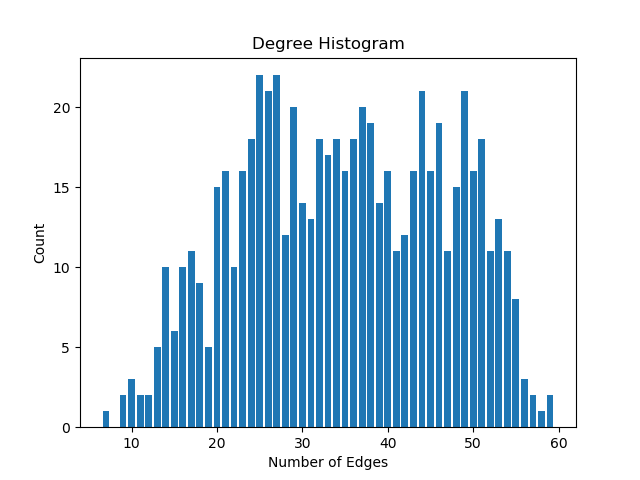

In [40]:
create_histogram(graph_1)

<IPython.core.display.Javascript object>


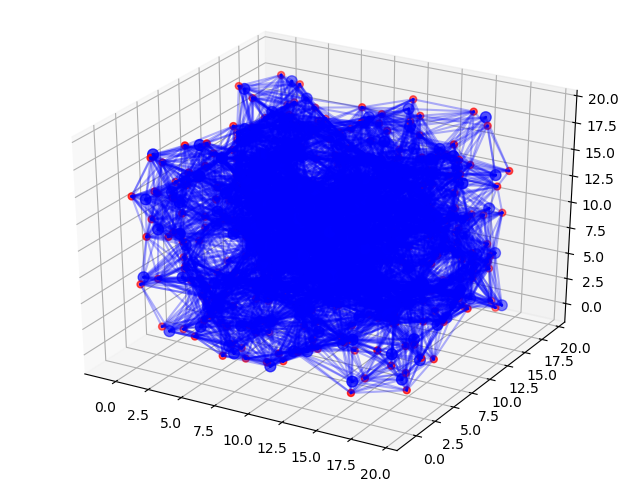

HBox(children=(IntProgress(value=0, max=11294), HTML(value='')))

In [41]:
draw_3d_graph(graph_1)

## Slow Preformance

This polygon count isn't that high. Let's try a more robust library...

In [42]:
init_notebook_mode(connected=True)

In [43]:
def draw_plotly_3d_scatter(in_graph):
    
    # Get the coordinate attributes back out of the graph.
    x_vals = [x for x in nx.get_node_attributes(in_graph, 'x').values()]
    y_vals = [x for x in nx.get_node_attributes(in_graph, 'y').values()]
    z_vals = [x for x in nx.get_node_attributes(in_graph, 'z').values()]
    
    # Create the color and size lists.
    c_vals = [color_dict[x[0]] for x in in_graph.nodes()]
    s_vals = [size_dict[x[0]] for x in in_graph.nodes()]
    
    Xe=[]
    Ye=[]
    Ze=[]
    
    # Iterate through the edges, and draw line segments for each set.
    for edge in tqdm_notebook(in_graph.edges()):

        # Assign the node edge indecies.
        node_a = edge[0]
        node_b = edge[1]

        # Assign the x, y, z variables.        
        xa = in_graph.node('x')[node_a]
        ya = in_graph.node('y')[node_a]
        za = in_graph.node('z')[node_a]

        xb = in_graph.node('x')[node_b]
        yb = in_graph.node('y')[node_b]
        zb = in_graph.node('z')[node_b]   
        
        Xe+=[xa, xb, None]
        Ye+=[ya, yb, None]
        Ze+=[za, zb, None]

    # Add the points to the scatter plot.
    trace1 = go.Scatter3d(
        x=x_vals,
        y=y_vals,
        z=z_vals,
        mode='markers',
        hovertext = [x for x in in_graph.nodes()],
        marker=dict(
            sizemode='area',
            color=c_vals,
            size=s_vals,
        opacity=0.8
        ),
    )
    
    trace2 = Scatter3d(
        x=Xe,
        y=Ye,
        z=Ze,
        mode='lines',
        line=Line(color='rgb(125,125,125)', width=1),
        hoverinfo='none'
    )

    # Show the plot.
    data = [trace1, trace2]
    fig = go.Figure(data=data)
    iplot(fig)

In [44]:
draw_plotly_3d_scatter(test_graph)

HBox(children=(IntProgress(value=0, max=432), HTML(value='')))

In [45]:
print('displaying {0} points with {1} edges!'.format(len(graph_1.nodes()), len(graph_1.edges())))
draw_plotly_3d_scatter(graph_1)

displaying 648 points with 11294 edges!


HBox(children=(IntProgress(value=0, max=11294), HTML(value='')))

### Explore other distances

In [46]:
# New graph, point to the data file.
hbond_graph = generate_graph(data_path='data/water1.xyz')

# Calculate the distance matrix of this graph.
hbond_graph_distance_matrix = calculate_distance_matrix(hbond_graph)

# Add an edge network based on the average hydrogen bond radii.
add_edge(
    water_bond_predicate(low=1.2, high=2.0),
    hbond_graph,
    hbond_graph_distance_matrix, 
    'water')

print('displaying {0} points with {1} edges!'.format(len(hbond_graph.nodes()), len(hbond_graph.edges())))
draw_plotly_3d_scatter(hbond_graph)

HBox(children=(IntProgress(value=0, max=210276), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


displaying 648 points with 454 edges!


HBox(children=(IntProgress(value=0, max=454), HTML(value='')))

### Comments

There is no consideration of node element or existing bond counts in this.

Let's try to ensure that hydrogen bonds (edges) are only created if they are between an oxygen and hydrogen.

Let's write more functions to work with our edge handler, and perhaps even re-consider its design..

```python
def add_edge(predicate, in_graph, dist_matrix, label_text):
    
    node_index = [x for x in in_graph.nodes()]

    for node, dist_array in tqdm_notebook(zip(in_graph.nodes(), dist_matrix)):
        
        for index, dist in enumerate(dist_array):
            
            if predicate(dist):
                # Get the node by this index.
                in_graph.add_edge(node, node_index[index])
```

In [47]:
def add_edge_distance(predicate, graph, graph_distance_matrix):
    """A helper to add edges to a graph based on a predicate. This iterates
    through the nodes and compares based on a pre-calculated
    distance matrix.
    
    :param predicate:
        A function that takes a pair of graph nodes and examines
        them for some condition. Should return a True or False.
        
    :param graph:
        A networkx graph object.
        
    :param graph_distance_matrix:
        A pre-calculated distance matrix of the graph.
        
    :returns:
        This modifies the given graph in place. Adding edges
        based on the given predicate boolean function.
    """
    
    # Generate a node index.
    node_index = [node for node in graph.nodes()]
    
    # For each node and its correspoding distance array, test the predicate.
    for node_a, dist_array in tqdm_notebook(zip(node_index, graph_distance_matrix)):
        
        # Enumerate through the dist_array.
        for index, dist in enumerate(dist_array):
            
            # Each enumeration corresponds to another node. We can find
            # the node based on our index above.
            node_b = node_index[index]
            
            # If the predicate function returns, add the new edge.
            if predicate(graph, dist, node_a, node_b):

                # Create the edge, and store the distance.
                graph.add_edge(node_a, node_b, length=dist)

With the new `add_edge_robust` function, lets redefine our predicate functions to work with the
new schema.

The old predicate function for distance.

```python
def water_bond_predicate(low, high):
    def predicate(distance):
        if low <= distance <= high:
            return True
        else:
            return False
    return predicate
```

### Get x, y, z coordinates from a node

In [48]:
def get_node_xyz(graph, in_node):
    """Returns a tuple of x, y, z values from a given
    graph and node pair. These attributes must already be
    defined in the node.
    
    :param graph:
        A networkx graph object.
    
    :param node:
        A networkx node object contained within the graph
        input above.
        
    :returns:
        A tuple of the x, y, z coordinates of the node.
    """
    
    # Find the coordinates.
    xx = graph.node('x')[in_node]
    yy = graph.node('y')[in_node]
    zz = graph.node('z')[in_node]
    
    # Return the tuple of them.
    return (xx, yy, zz)

### Define new predicates

We need a wrapper function that can pass arbirary defaults to logic functions. Such as ranges to atom distance checkers.

In [49]:
def predicate_bond_distance_robust(low, high):
    """Defines a boolean predicate function that will take
    two networkx node objects: `(node_1, node_2)`. And check
    if they are within the range given in `low` and `high`.
    
    :param graph:
        A networkx graph object.
        
    :param graph_distance_matrix:
        A precalculated distance matrix of the above graph.

    :param low:
        The low range to be considered. Not inclusive.
        
    :param high:
        The high range to be considered. Not inclusive.
    """
    
    # Define the function to be returned.
    def bond_distance_robust(graph, distance, node_1, node_2):
          
        # Check if this distance falls within the desired range.
        if low < distance < high:
            return True
        
        # This else and return False are not really needed in Python.
        else:
            return False
        
    # Now return this sweet function.
    return bond_distance_robust

In [50]:
def hydrogen_oxygen_bond():
    """Define a predicate function generator that compares atom types.
    
    This function checks to see if the atom type of node1 and node2
    are the set ( hydrogen && oxygen ).
    """
        
    # Define the function to be returned.
    def predicate(graph, graph_distance_matrix, node_1, node_2):
        
        # Get the atom type of each node.
        # For now, just get the first character of the nodes index.
        # TODO: Reconsider our creation function.
        node_1_atom_type = graph.node(node_1)
        node_2_atom_type = graph.node(node_2)
        
        # Create the set of these.
        in_set = set(node_1_atom_type, node_2_atom_type)
        
        # Creat the compare set.
        good_set = set('H', 'O')
        
        # If they match, return True.
        if in_set == good_set:
            return True
        
    # Now return this sweet function.
    return predicate

## Testing new predicates

In [51]:
# New graph, point to the data file.
graph3 = generate_graph(data_path='data/water1.xyz')


# Calculate the distance matrix of this graph.
graph3_distance_matrix = calculate_distance_matrix(graph3)


add_edge_distance(
    predicate=predicate_bond_distance_robust(0.01, 1.5),
    graph=graph3,
    graph_distance_matrix=graph3_distance_matrix
)

print('displaying {0} points with {1} edges!'.format(len(graph3.nodes()), len(graph3.edges())))


draw_plotly_3d_scatter(graph3)

HBox(children=(IntProgress(value=0, max=210276), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


displaying 648 points with 432 edges!


HBox(children=(IntProgress(value=0, max=432), HTML(value='')))

In [54]:
def distance_and_type(low, high, bond_set={'H', 'O'}):
    """Combine some predicates. I want to change how this is
    implemented.
    
    This function should only create edges within the given
    low and high values, and only between hydrogens and oxygens.
    """
    
    def predicate(graph, distance, node_1, node_2):
        
        # Check if this distance falls within the desired range.
        if low < distance < high:

            # Get the atom type of each node.
            # For now, just get the first character of the nodes index.
            # TODO: Reconsider our creation function.
            # Create the node index            
            node_1_atom = node_1[0]
            node_2_atom = node_2[0]
            
            # Create the set of these.
            in_set = set([node_1_atom, node_2_atom])

            # If they match, return True.
            if in_set == bond_set:
                return True
            else:
                return False

            
        # This else and return False are not really needed in Python.
        else:
            return False

    return predicate

## Create only Oxygen to Hydrogen edges

In [55]:
# New graph, point to the data file.
graph4 = generate_graph(data_path='data/water1.xyz')


# Calculate the distance matrix of this graph.
graph4_distance_matrix = calculate_distance_matrix(graph4)


add_edge_distance(
    predicate=distance_and_type(0.1, 2.5),
    graph=graph4,
    graph_distance_matrix=graph4_distance_matrix
)

print('displaying {0} points with {1} edges!'.format(len(graph4.nodes()), len(graph4.edges())))


draw_plotly_3d_scatter(graph4)

HBox(children=(IntProgress(value=0, max=210276), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


displaying 648 points with 759 edges!


HBox(children=(IntProgress(value=0, max=759), HTML(value='')))

# More Functions

In [56]:
def explore_set_distance(low, high, bond_set):
    # New graph, point to the data file.
    new_graph = generate_graph(data_path='data/water1.xyz')


    # Calculate the distance matrix of this graph.
    new_graph_distance_matrix = calculate_distance_matrix(new_graph)


    add_edge_distance(
        predicate=distance_and_type(low, high),
        graph=new_graph,
        graph_distance_matrix=new_graph_distance_matrix
    )

    print('displaying {0} points with {1} edges!'
          .format(len(new_graph.nodes()), len(new_graph.edges())))


    draw_plotly_3d_scatter(new_graph)

## Draw Oxygen to Oxygen Edges between 5.9 and 6.0 angstroms

In [57]:
explore_set_distance(5.9, 6.0, {'O', 'O'})

HBox(children=(IntProgress(value=0, max=210276), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


displaying 648 points with 340 edges!


HBox(children=(IntProgress(value=0, max=340), HTML(value='')))

## Reconsider the Edge addition function

Also reconsider how to handle predicate functions so they can be more easily combined.

Also consider calculating:
+ dipole angles
+ dihedral hangles

In [58]:
node_index = [x for x in test_graph.nodes()]

for node, dist_array in tqdm_notebook(zip(node_index, test_distance_matrix)):
    
    
    # Check if the current node is an oxygen.
    if node[0] == 'O':
        
        # Get the neighbors.
        node_neighbors = [x for x in test_graph.neighbors(node)]
        

        # If there are two, we have a water.
        if len(node_neighbors) == 2:

NameError: name 'oh1' is not defined